In [38]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from time import time

tqdm.pandas()

# Get data
train_data_small = pd.read_csv(r"C:\Users\sashw\OneDrive\Desktop\TUe\SLT\SLT_Assignment1\MNIST_train_small.csv")
test_data_small = pd.read_csv(r"C:\Users\sashw\OneDrive\Desktop\TUe\SLT\SLT_Assignment1\MNIST_test_small.csv")

In [41]:
# Func to extract features and labels form dataset
def get_features_targets(data):

    targets= data.iloc[:, 0]
    features= data.iloc[:, 1:]
    features.columns = list(range(features.shape[1]))

    return features, targets

In [42]:
# Create KNN Classifier

class KNN:

    # Initialize Object
    def __init__(self, k, distance):
        if distance == 'l2':
            self.norm = 2
        self.features = None
        self.labels = None
        self.k = k

    # Fit to training set
    def fit(self, features, labels):
        self.features = features
        self.labels = labels

        
    # Prediction for one element
    def predict_one(self, x, mult=None):

        # start_time = time()
        distances = self.features.apply(lambda row: np.linalg.norm(row.sub(x), ord=self.norm), axis=1)
        # print(f"{time()-start_time}s taken to calculate all distances")
        distances = distances.sort_values().loc[distances!=0]
        

        if mult:

            # Output max neighbours in k list
            k_neighbours = distances[:np.max(self.k)].index
            k_neighbours_labels = self.labels.loc[k_neighbours]

            return np.array(k_neighbours_labels)
        
        else:
            k_neighbours = distances[:self.k].index
            k_neighbours_labels = self.labels.loc[k_neighbours]
            prediction_label = k_neighbours_labels.mode()[0]

            return prediction_label
    
    # Prediction for dataset
    def predict(self, x, mult=None):
        predictions = x.progress_apply(lambda row: self.predict_one(row, mult), axis=1)

        return predictions

    # Error score
    def error_score(self, data_feature, data_label):
        predictions = self.predict(data_feature)
        errors = predictions.sub(data_label)
        error_score = len(errors.loc[errors!=0])/len(data_label)

        return error_score 
    
    # Error scores for multiple ks
    def error_mult(self, data_feat, data_labels):

        if isinstance(self.k, (np.ndarray, list)):
            predictions = self.predict(data_feat, mult=True)
            error_rates = []

            for i in self.k:
                predictions_k = predictions.apply(lambda x: pd.Series(x[:i]).mode()[0])
                errors = predictions_k.sub(data_labels)
                error_score = len(errors.loc[errors!=0])/len(data_labels)
                error_rates.append(error_score)
                
            return error_rates
            
        else:
            print("This method is used for multiple K")
            pass


In [43]:
# Get features and labels for datasets
train_small_X, train_small_y = get_features_targets(train_data_small)
test_small_X, test_small_y = get_features_targets(test_data_small)

In [24]:
# Create KNN instance
KNN_test = KNN(k=3, distance='l2')
KNN_test.fit(train_small_X, train_small_y)

In [25]:
# Test working on small subset
train_small_now = train_small_X[:10]
predictions = KNN_test.predict(train_small_now)
print(predictions)

100%|██████████| 10/10 [00:01<00:00,  6.52it/s]

0    3
1    4
2    3
3    1
4    3
5    6
6    8
7    4
8    0
9    1
dtype: int64


In [26]:
train_y_now = train_small_y[:10]

# Error score test with small data
print(KNN_test.error_score(train_small_now, train_y_now))

100%|██████████| 10/10 [00:01<00:00,  6.65it/s]

0.1


In [48]:
k_list = np.array([i for i in range(1,20)])
KNN_mult = KNN(k=k_list, distance='l2')
KNN_mult.fit(train_small_X, train_small_y)

In [28]:
errors_training = KNN_mult.error_mult(train_small_X, train_small_y)
print(errors_training)

100%|██████████| 2999/2999 [07:05<00:00,  7.04it/s]


[0.08069356452150717, 0.08869623207735912, 0.07869289763254418, 0.07902634211403801, 0.0800266755585195, 0.08302767589196398, 0.08336112037345782, 0.08936312104034679, 0.08769589863287762, 0.09003001000333445, 0.09203067689229744, 0.09436478826275425, 0.09503167722574192, 0.09436478826275425, 0.0960320106702234, 0.09836612204068022, 0.09736578859619874, 0.10036678892964321, 0.09903301100366789]


In [49]:
errors_testing = KNN_mult.error_mult(test_small_X, test_small_y)
print(errors_testing)

100%|██████████| 999/999 [02:50<00:00,  5.86it/s]


[0.08508508508508508, 0.1041041041041041, 0.08308308308308308, 0.07907907907907907, 0.08308308308308308, 0.07807807807807808, 0.08608608608608609, 0.07807807807807808, 0.09509509509509509, 0.0960960960960961, 0.1011011011011011, 0.1041041041041041, 0.1021021021021021, 0.10510510510510511, 0.1091091091091091, 0.11011011011011011, 0.11211211211211211, 0.1111111111111111, 0.11311311311311312]


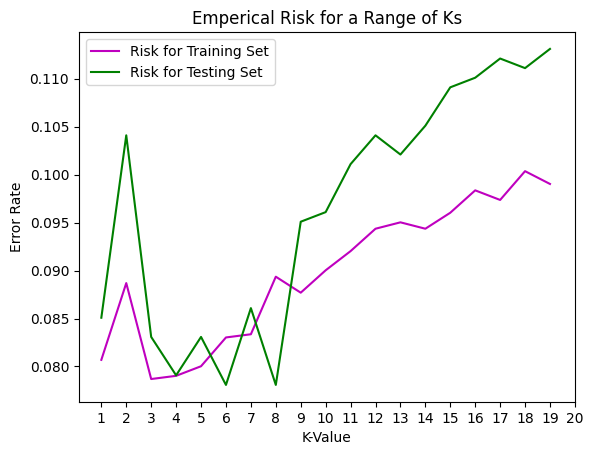

In [50]:
import matplotlib.pyplot as plt

plt.plot(k_list, errors_training, color='m', label='Risk for Training Set')
plt.plot(k_list, errors_testing, color='g', label='Risk for Testing Set')
plt.title('Emperical Risk for a Range of Ks')
plt.ylabel('Error Rate')
plt.xlabel('K-Value')
plt.xticks(list(range(1,21)))
plt.legend()
plt.show()

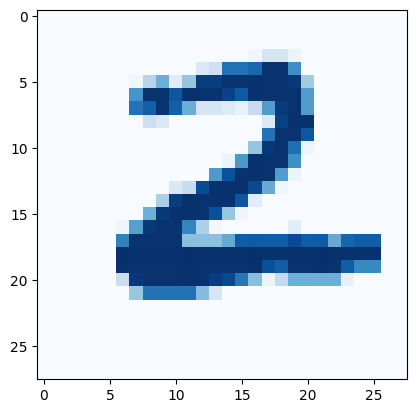

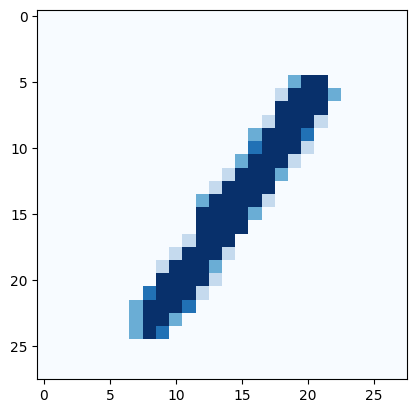

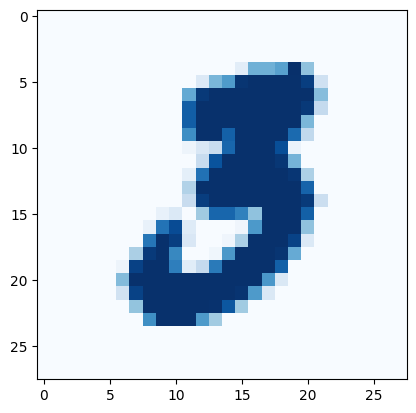

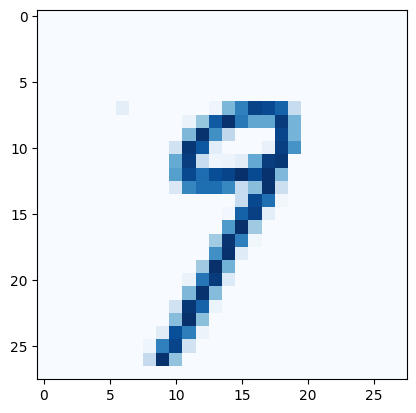

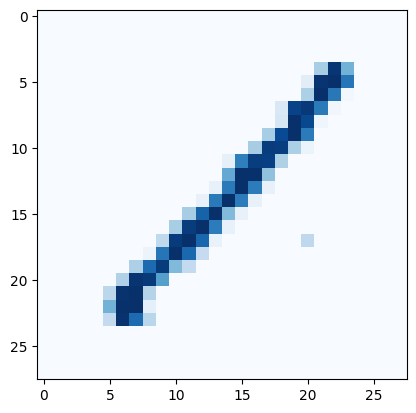

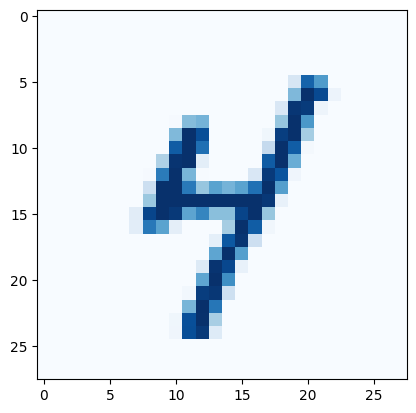

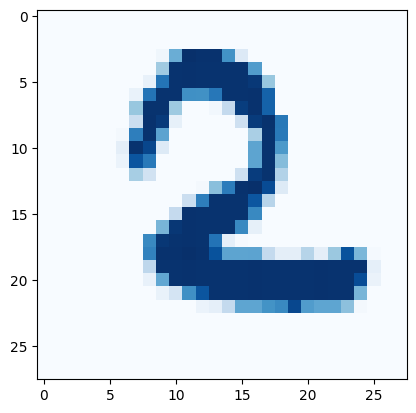

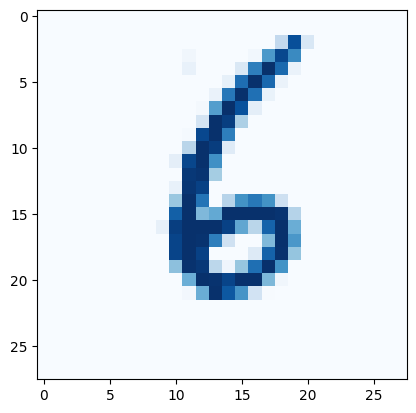

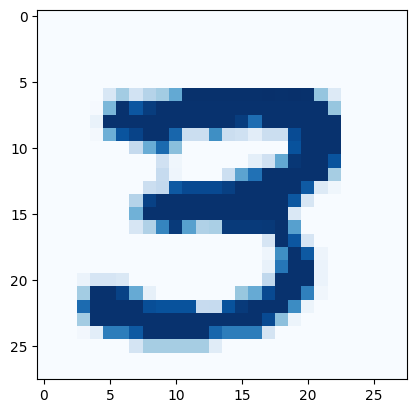

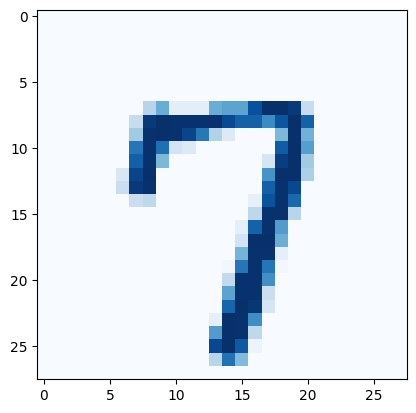

In [51]:
for i in range(10):
    plt.imshow(test_small_X.iloc[i].values.reshape(28,28), cmap='Blues')
    plt.show()